# Overfitting - Regilarization in Classification

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [2]:
# Loading dataset
iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

In [3]:
# Define regularization strengths to try
C_values = [0.01, 0.1, 1, 10, 100, 1000] #C=1/lambda

# Split data into training and test sets
np.random.seed(0)
indices = np.random.permutation(len(X))
X_train, y_train = X[indices[:-30]], y[indices[:-30]]
X_test, y_test = X[indices[-30:]], y[indices[-30:]]

Accuracy for C = 0.01: 0.533
Accuracy for C = 0.1: 0.633
Accuracy for C = 1: 0.667
Accuracy for C = 10: 0.800
Accuracy for C = 100: 0.833
Accuracy for C = 1000: 0.867


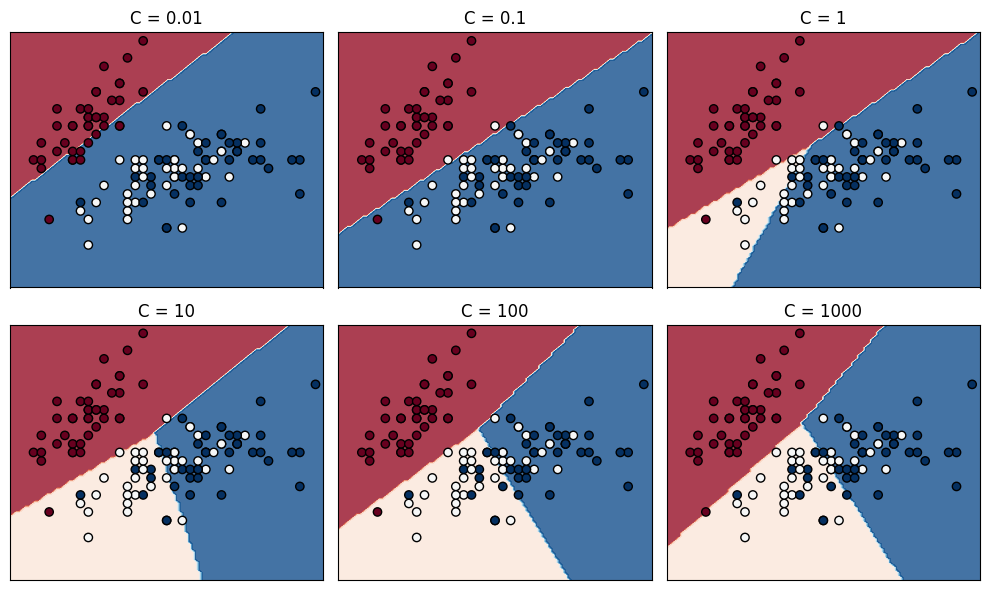

In [5]:
# Fit models with different regularization strengths
plt.figure(figsize=(10,6))
for i, C in enumerate(C_values):
    clf = LogisticRegression(penalty='l2', C=C, solver='liblinear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy for C = {}: {:.3f}".format(C, accuracy))

    # Plot decision boundary
    plt.subplot(2, 3, i+1)
    xx, yy = np.meshgrid(np.linspace(4, 8, 100), np.linspace(1.5, 4.5, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("C = {}".format(C))

plt.tight_layout()
plt.show();
